In [1]:
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras import Model
import numpy as np


### Example data load

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/ThoraricSurgery.csv'
#Data = np.loadtxt('ThoraricSurgery.csv', delimiter=',')
Data = np.loadtxt(url, delimiter=',')

### Splitting data into input and output

In [3]:
X = Data[:, :17]
Y = Data[:, 17]
X.shape, Y.shape

((470, 17), (470,))

### Functional API

In [4]:
## Input layer with 17 features
InpLayer = Input(shape=(X.shape[-1]), name='Inp')
InpLayer

<KerasTensor: shape=(None, 17) dtype=float32 (created by layer 'Inp')>

In [5]:
## Hidden layer 1 with a 2D wiegh matrix (17 , 10) and a 2D bias matrix (1, 10)
HL1 = Dense(10, activation='relu', name='HL1')(InpLayer)
HL1

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'HL1')>

In [6]:
### Alternative approach
HL1 = Dense(10, activation='relu', name='HL1')
HL1 = HL1(InpLayer)
HL1

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'HL1')>

In [7]:
## Concatenating InpLayer and HD2 to generate HD3
HL2 = Concatenate(axis=1, name='HL2')([InpLayer, HL1])
HL2

<KerasTensor: shape=(None, 27) dtype=float32 (created by layer 'HL2')>

In [8]:
## Hidden layer 3 with a 2D wiegh matrix (27 , 5) and a 2D bias matrix (1, 5)
HL3 = Dense(5, activation='relu', name='HL3')(HL2)
HL3

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'HL3')>

In [9]:
## Output layer a 2D wiegh matrix (5 , 1) and a 2D bias matrix (1, 1)
Out = Dense(1, activation='sigmoid', name='Out')(HL3)


In [10]:
### Defining the model by specifying inputs and outputs
model = Model(InpLayer, Out)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inp (InputLayer)                [(None, 17)]         0                                            
__________________________________________________________________________________________________
HL1 (Dense)                     (None, 10)           180         Inp[0][0]                        
__________________________________________________________________________________________________
HL2 (Concatenate)               (None, 27)           0           Inp[0][0]                        
                                                                 HL1[0][0]                        
__________________________________________________________________________________________________
HL3 (Dense)                     (None, 5)            140         HL2[0][0]                    

 ### Compliling the model
 #### You need to sepcify the loss function and the optimizer

In [12]:
model.compile(loss='BCE', optimizer='adam')

In [13]:
model.fit(X,Y, validation_split=0.2, epochs=50, batch_size=200)
Logs = model.history.history

Epoch 1/50
2/2 [==============================] - 2s 1s/step - loss: 9.3178 - val_loss: 10.6700
Epoch 2/50
2/2 [==============================] - 0s 30ms/step - loss: 8.4237 - val_loss: 10.1181
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 8.1603 - val_loss: 9.5648
Epoch 4/50
2/2 [==============================] - 0s 30ms/step - loss: 8.2674 - val_loss: 9.0104
Epoch 5/50
2/2 [==============================] - 0s 29ms/step - loss: 7.5610 - val_loss: 8.4890
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 6.8108 - val_loss: 8.0272
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 6.5239 - val_loss: 7.5762
Epoch 8/50
2/2 [==============================] - 0s 30ms/step - loss: 6.0047 - val_loss: 7.1265
Epoch 9/50
2/2 [==============================] - 0s 31ms/step - loss: 5.9848 - val_loss: 6.6789
Epoch 10/50
2/2 [==============================] - 0s 31ms/step - loss: 5.1685 - val_loss: 6.2752
Epoch 11/50
2/2 [============

### Visualization of losses

In [14]:
import matplotlib.pyplot as plt


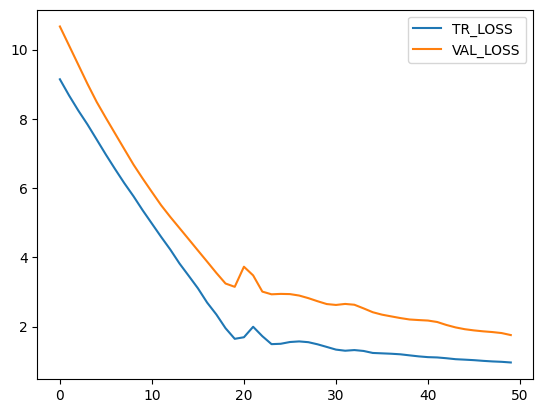

In [15]:
plt.plot(Logs['loss'], label='TR_LOSS')
plt.plot(Logs['val_loss'], label='VAL_LOSS')
plt.legend()